In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


In [12]:
df=pd.read_csv('PCA_data.csv',delimiter=',')
df.head()

,customer_id,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,last_promo_DISCOUNT,...,payment_method_CASH,payment_method_DIGI,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,1b8f824d5e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.295945,-0.445237,-0.778433,0.311961,0.054672,-0.110476,-0.141609,0.232893
1,5d272b9dcb,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,-0.296883,-0.497895,-0.761456,-0.009660,-0.092699,-0.076241,-0.158929,-0.065966
2,f6d1b2ba63,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,-0.119790,-0.444279,-0.729543,0.132792,-0.512660,0.111132,0.161004,-0.060958
3,180c632ed8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.322302,-0.328141,-0.746995,0.004326,-0.071154,-0.082533,-0.019563,0.033507
4,4eb37a6705,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.322450,-0.345026,-0.739681,-0.125103,-0.134561,-0.107185,-0.109648,0.229223


In [14]:
df.set_index('customer_id',inplace=True)

In [15]:
metric_features=df.columns

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30554 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_region_2440          30554 non-null  float64
 1   customer_region_2490          30554 non-null  float64
 2   customer_region_4140          30554 non-null  float64
 3   customer_region_4660          30554 non-null  float64
 4   customer_region_8370          30554 non-null  float64
 5   customer_region_8550          30554 non-null  float64
 6   customer_region_8670          30554 non-null  float64
 7   customer_region_Unknown       30554 non-null  float64
 8   last_promo_DISCOUNT           30554 non-null  float64
 9   last_promo_FREEBIE            30554 non-null  float64
 10  last_promo_no_promotion_used  30554 non-null  float64
 11  payment_method_CASH           30554 non-null  float64
 12  payment_method_DIGI           30554 non-null  float

In [20]:
range_clusters = range(5, 30)
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

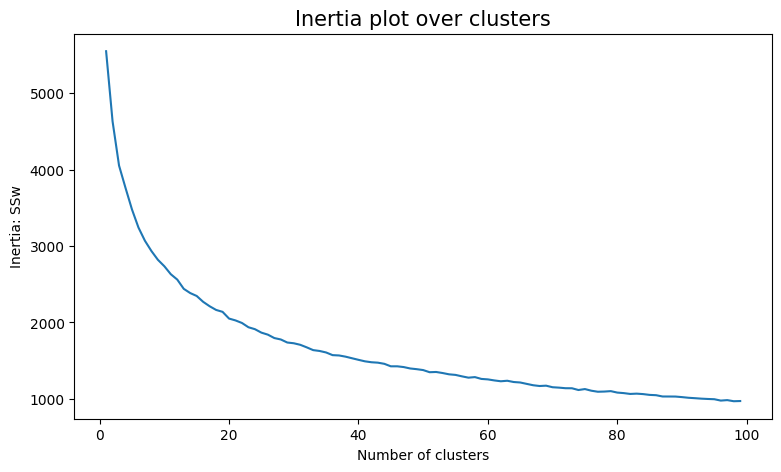

In [17]:
plt.figure(figsize=(9,5))
plt.plot(range_clusters, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

For n_clusters = 5, the average silhouette_score is : 0.17127758115128894
For n_clusters = 6, the average silhouette_score is : 0.18413062408085695
For n_clusters = 7, the average silhouette_score is : 0.2004264971316396
For n_clusters = 8, the average silhouette_score is : 0.19495913074699567
For n_clusters = 9, the average silhouette_score is : 0.20318061770938348
For n_clusters = 10, the average silhouette_score is : 0.19876830222774372
For n_clusters = 11, the average silhouette_score is : 0.20342639903342272
For n_clusters = 12, the average silhouette_score is : 0.21121758860871595
For n_clusters = 13, the average silhouette_score is : 0.21244986222198098
For n_clusters = 14, the average silhouette_score is : 0.2157296194361765
For n_clusters = 15, the average silhouette_score is : 0.2245988268366808
For n_clusters = 16, the average silhouette_score is : 0.20036927870244378
For n_clusters = 17, the average silhouette_score is : 0.22303247509018978
For n_clusters = 18, the average 

<ipython-input-21-be8ddca7fc1b>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(13, 7))


For n_clusters = 25, the average silhouette_score is : 0.21672687537685426
For n_clusters = 26, the average silhouette_score is : 0.20446561728335355
For n_clusters = 27, the average silhouette_score is : 0.21781816374546478
For n_clusters = 28, the average silhouette_score is : 0.2082023496764944
For n_clusters = 29, the average silhouette_score is : 0.2051913238877805


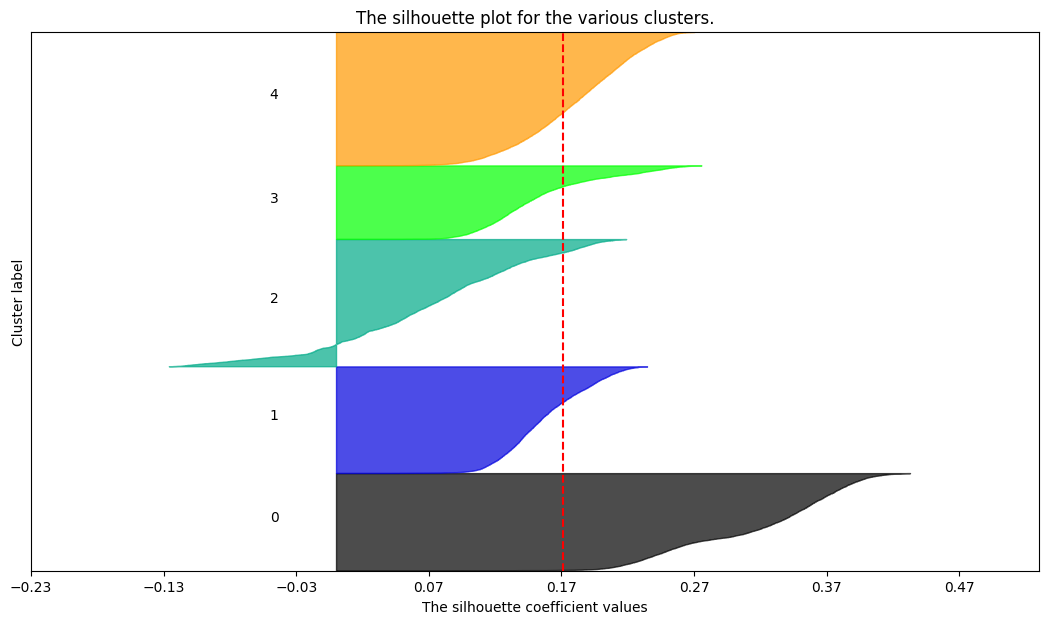

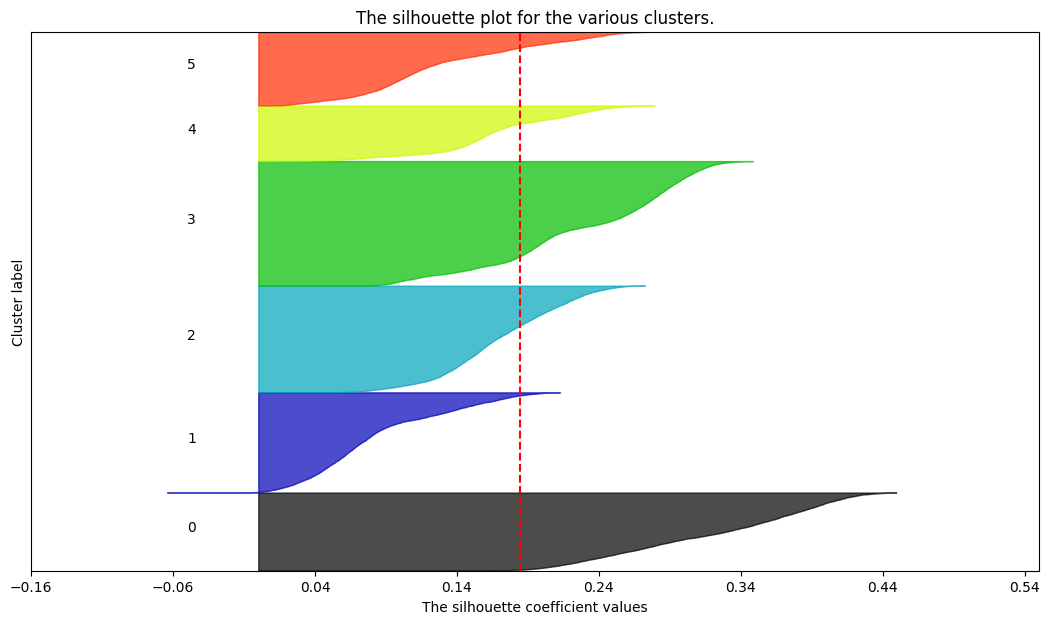

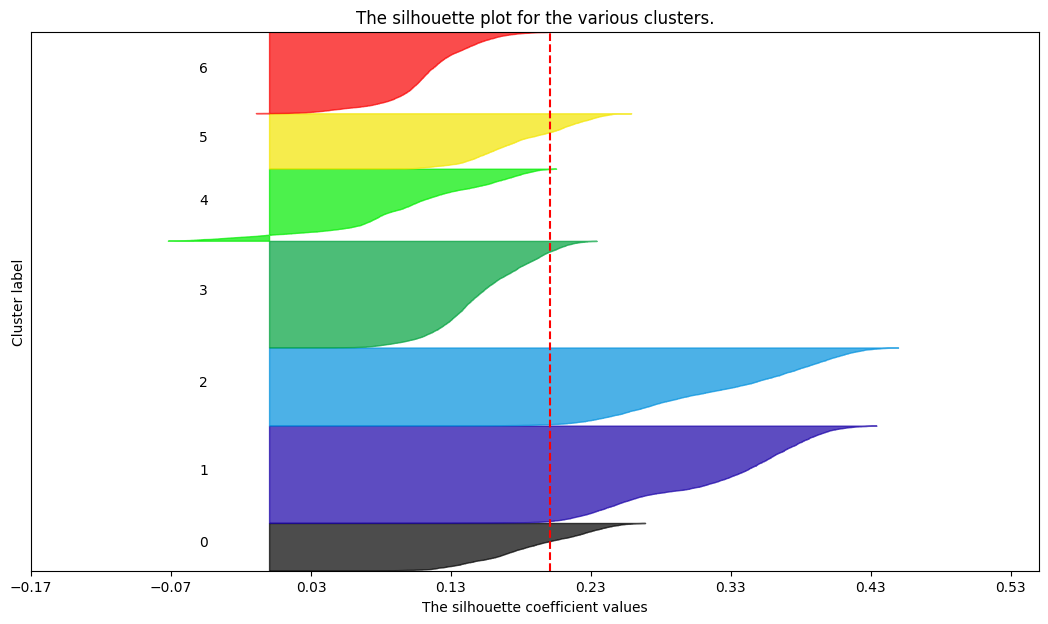

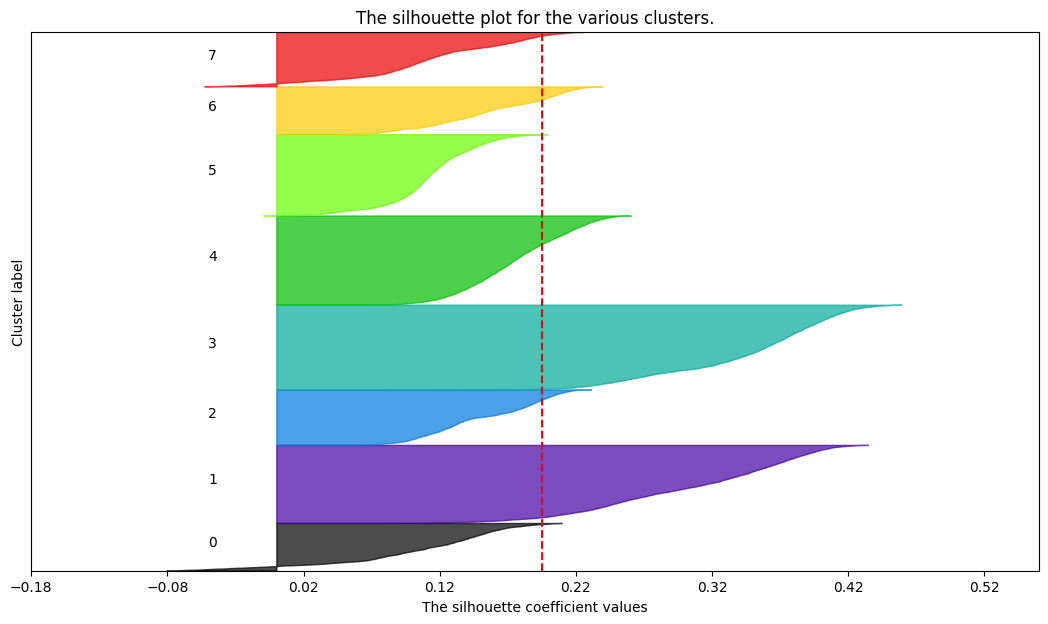

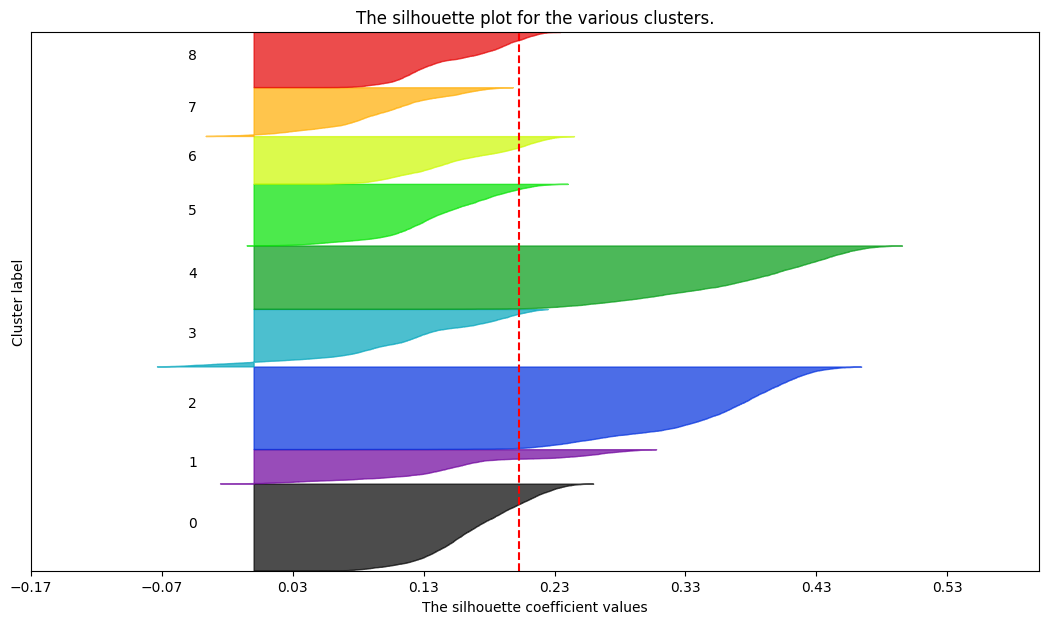

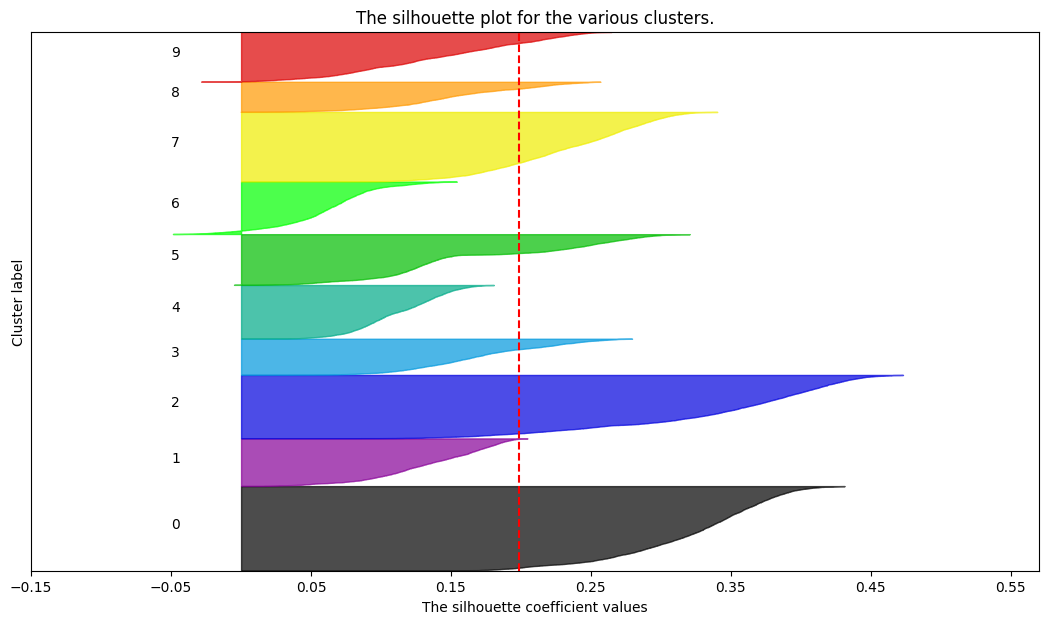

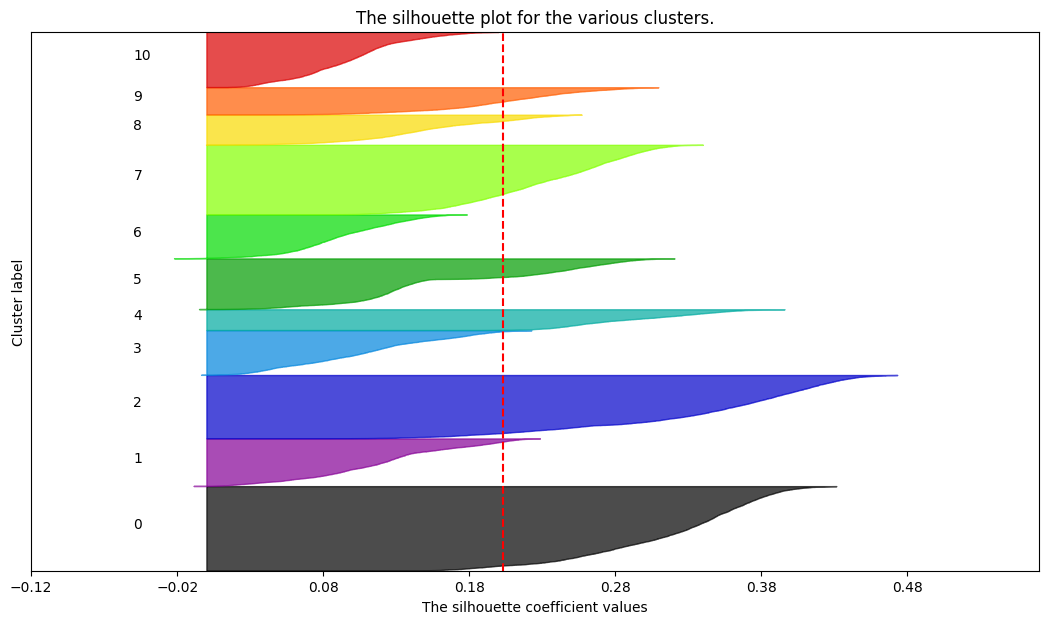

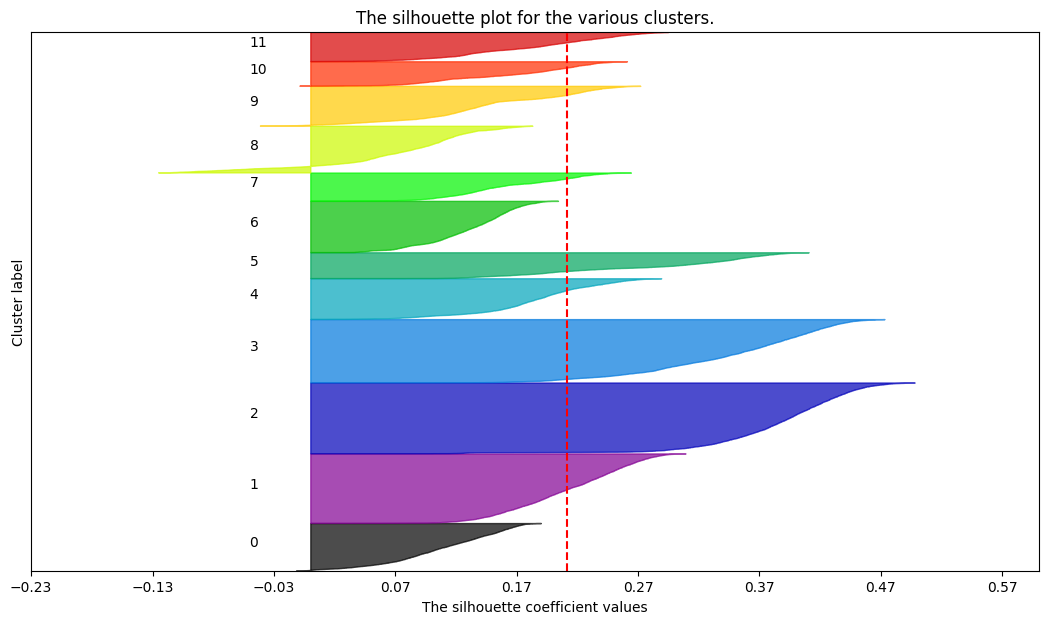

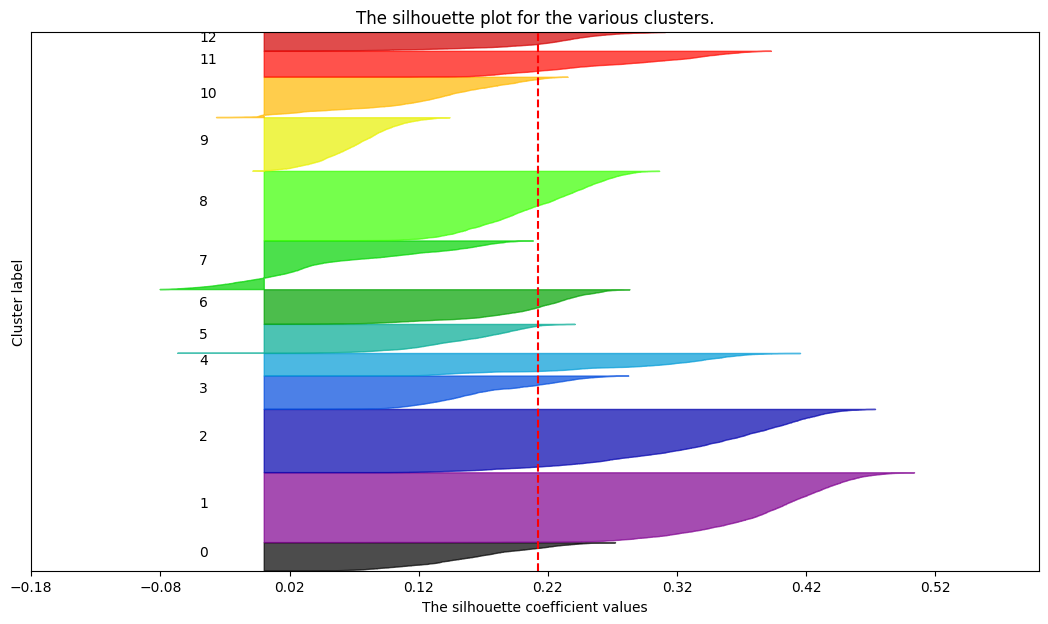

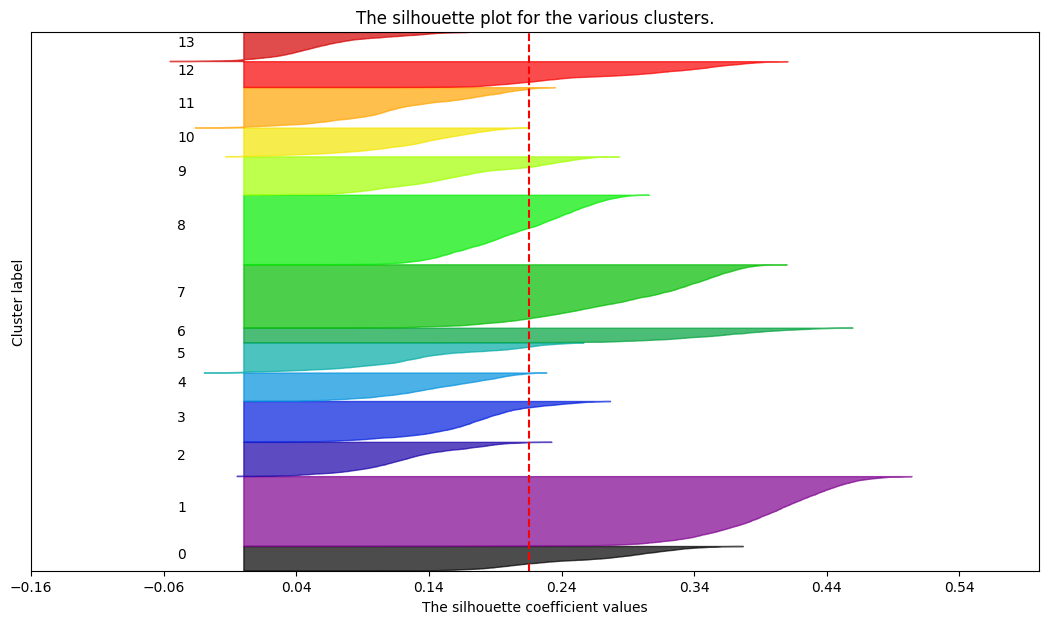

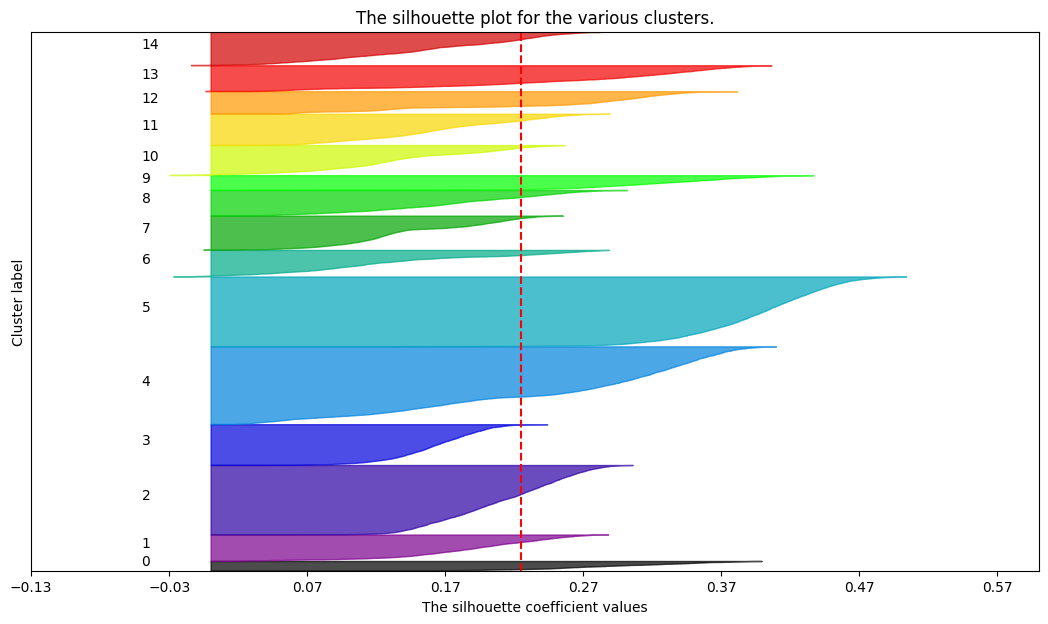

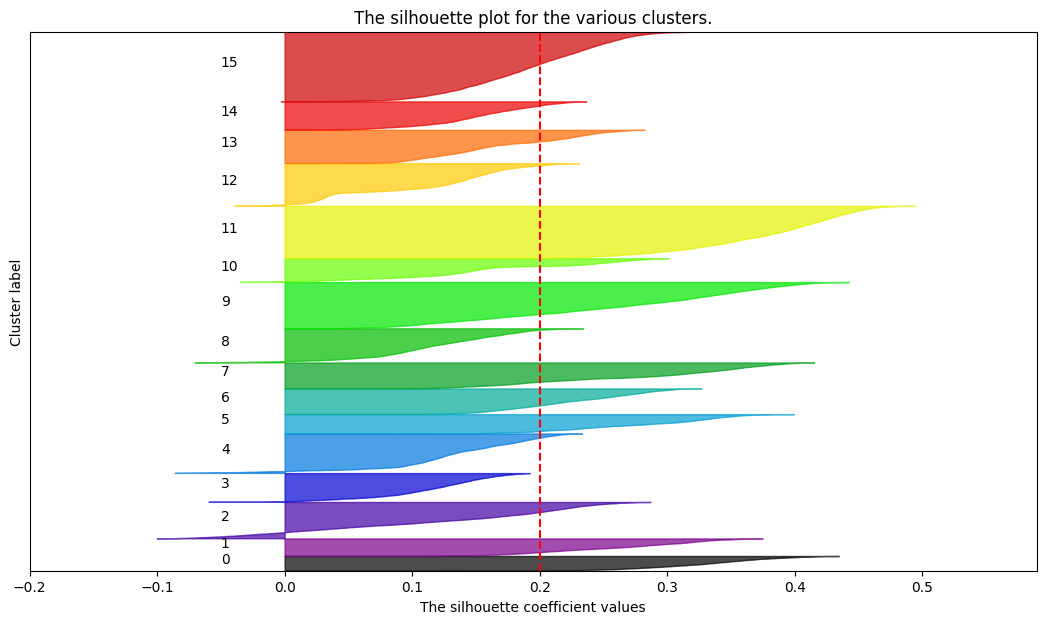

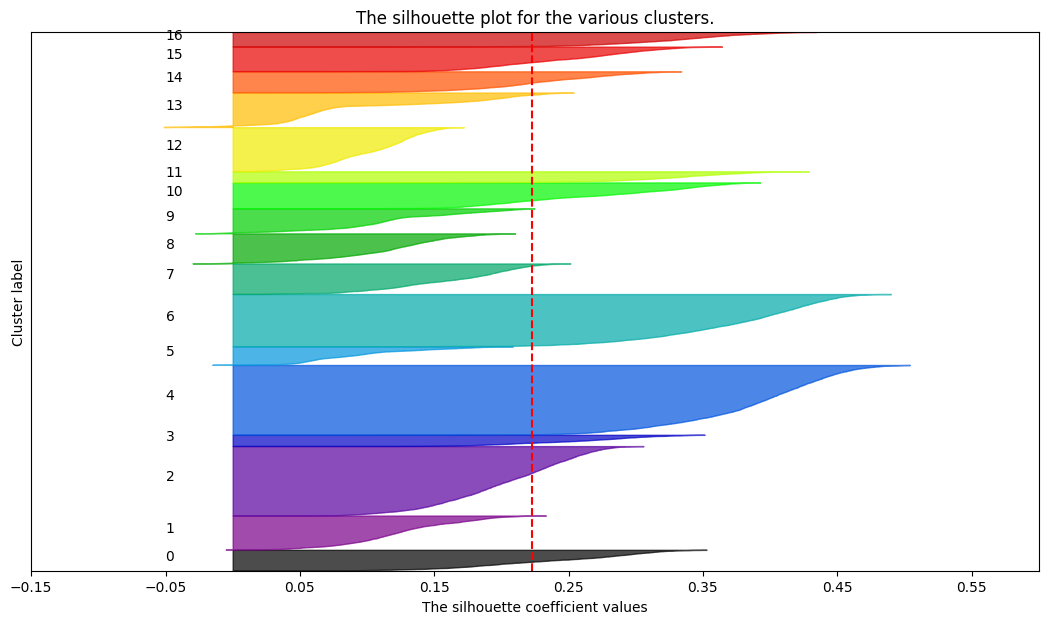

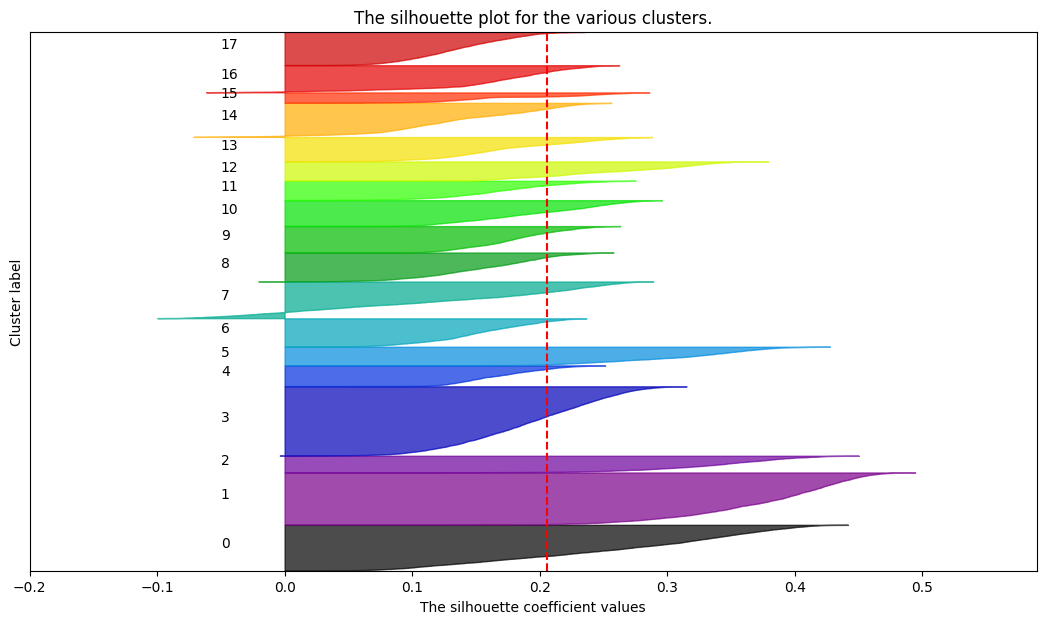

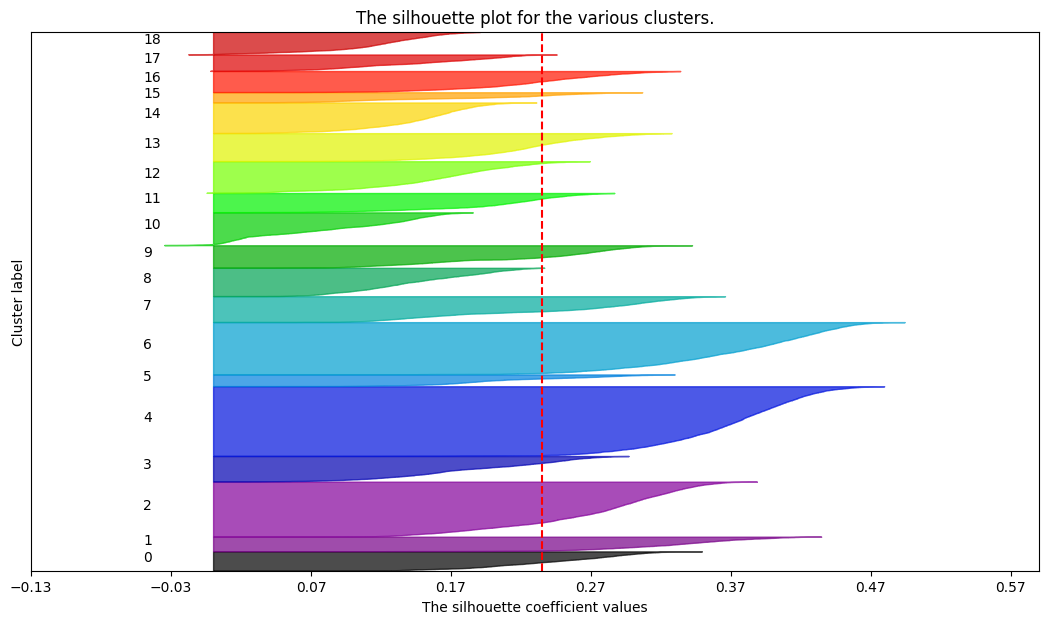

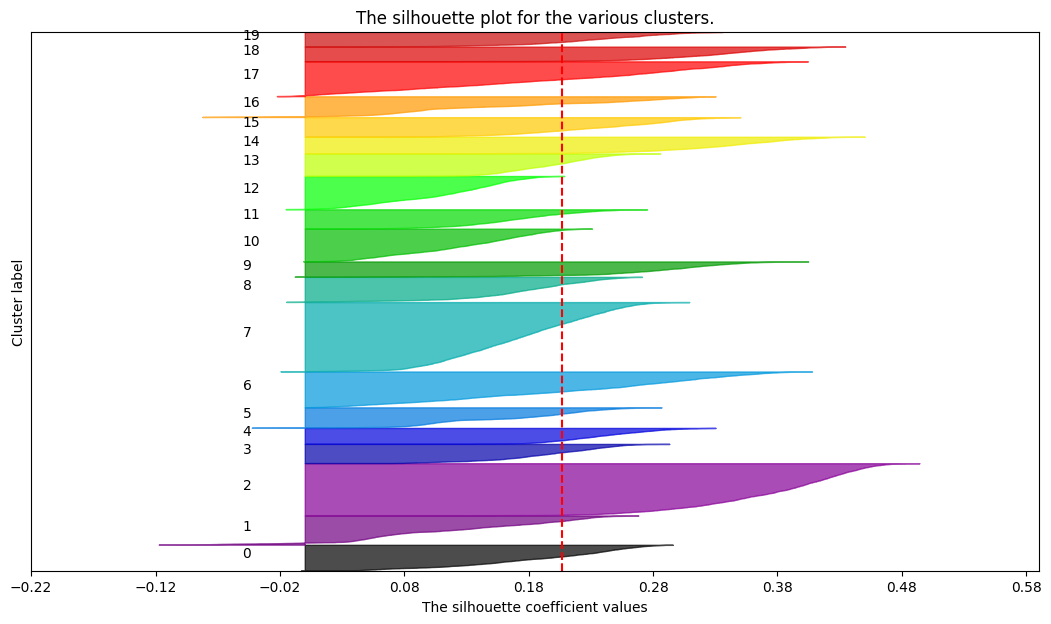

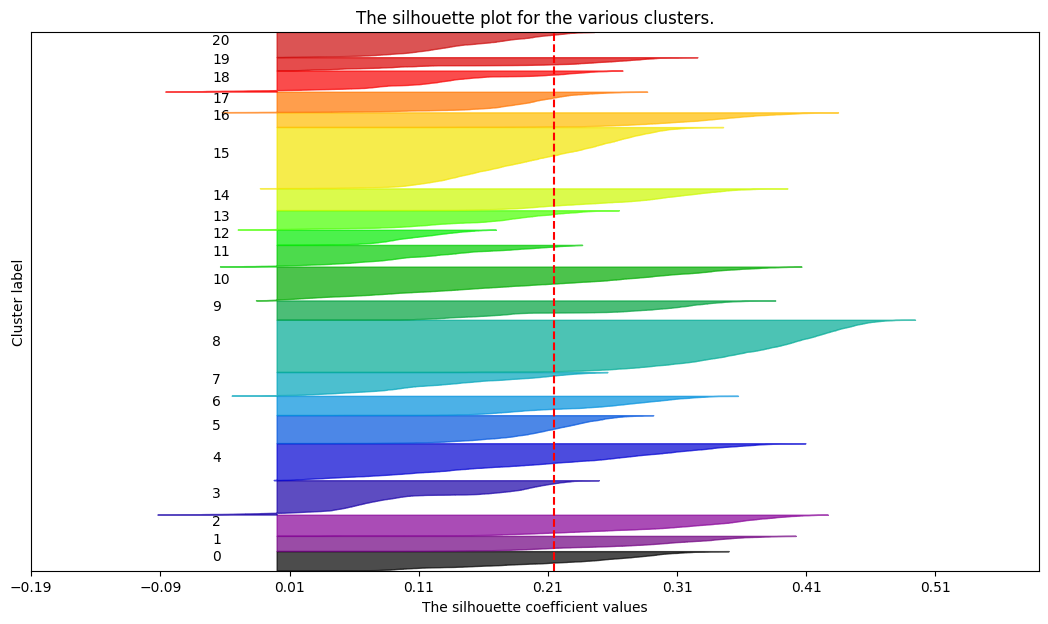

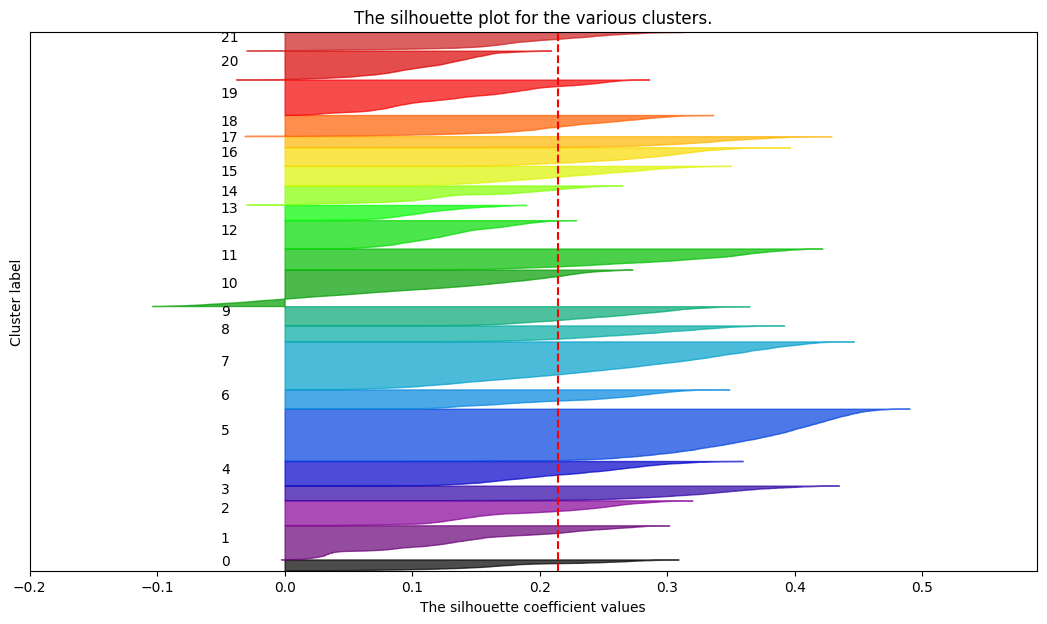

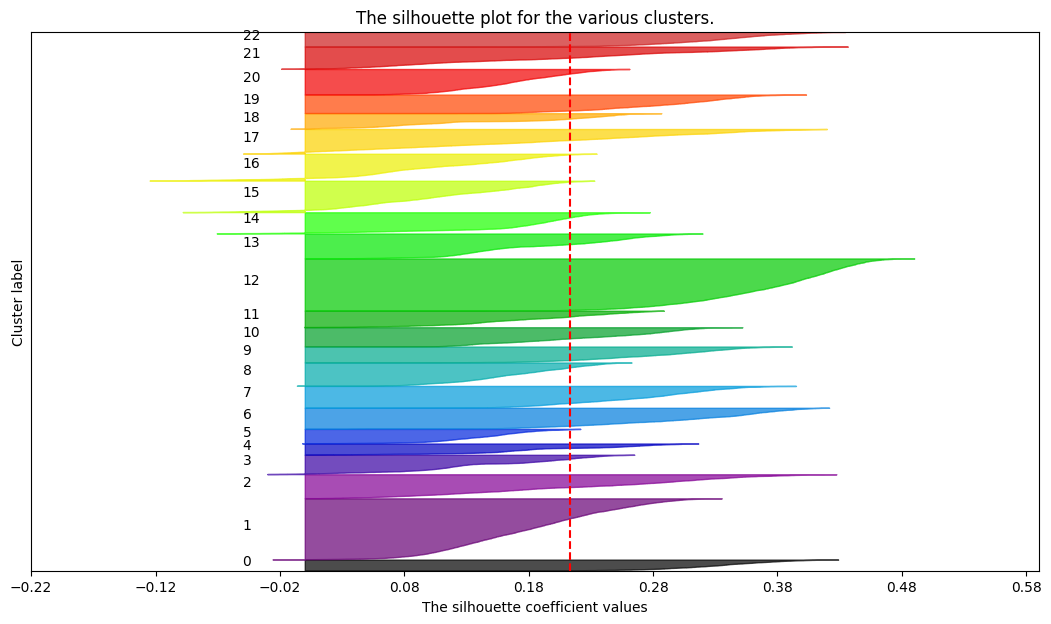

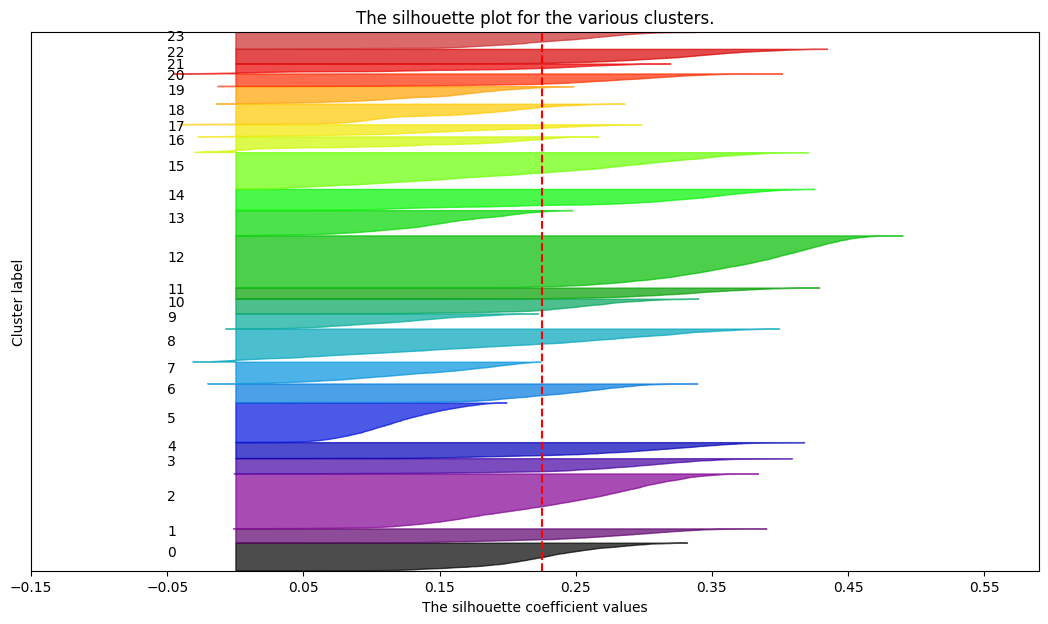

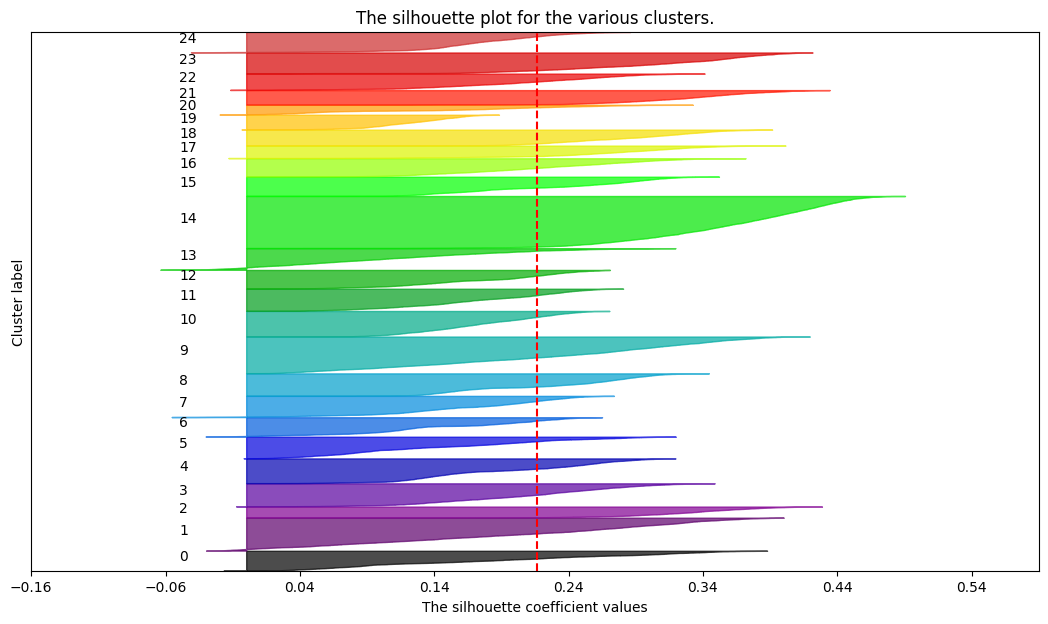

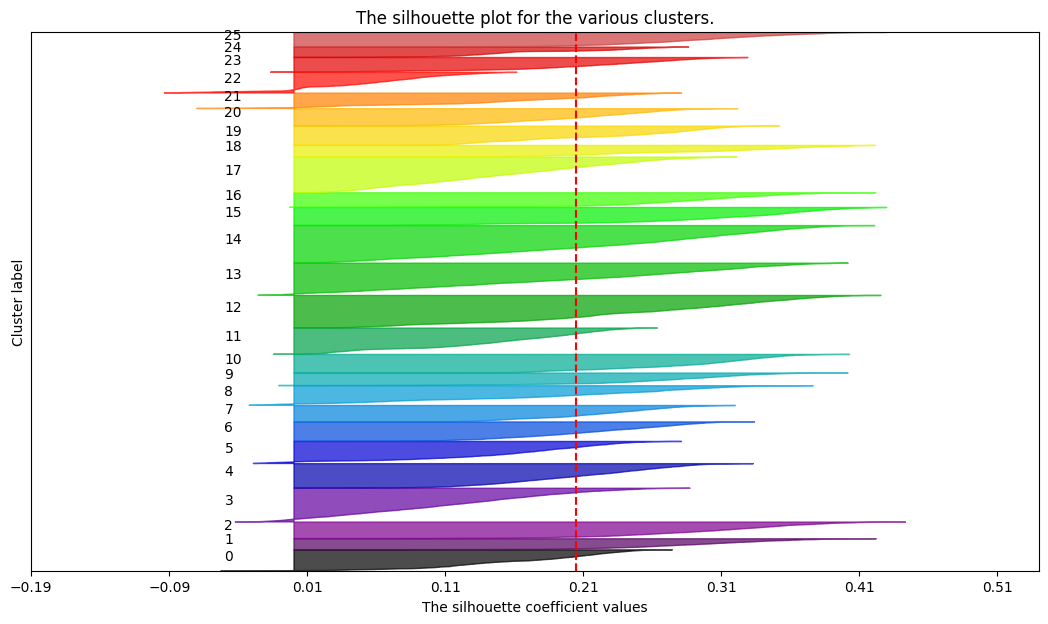

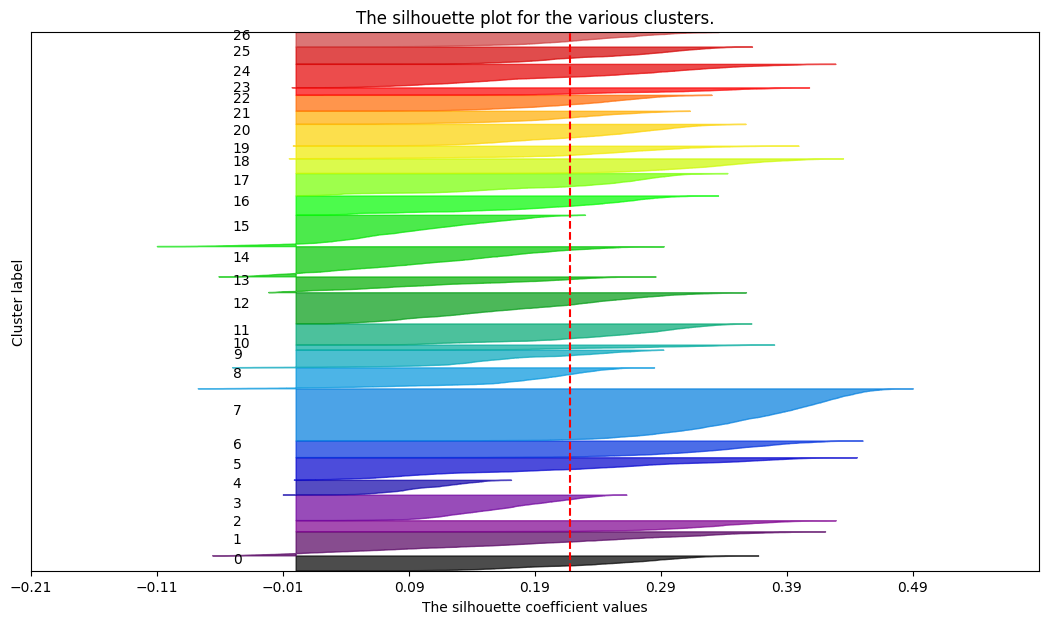

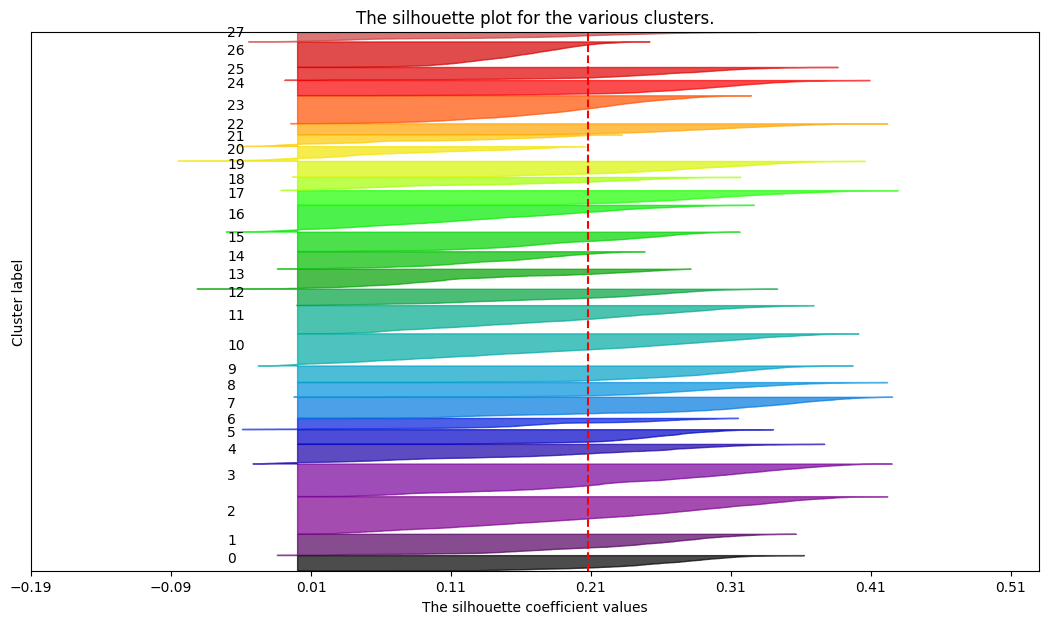

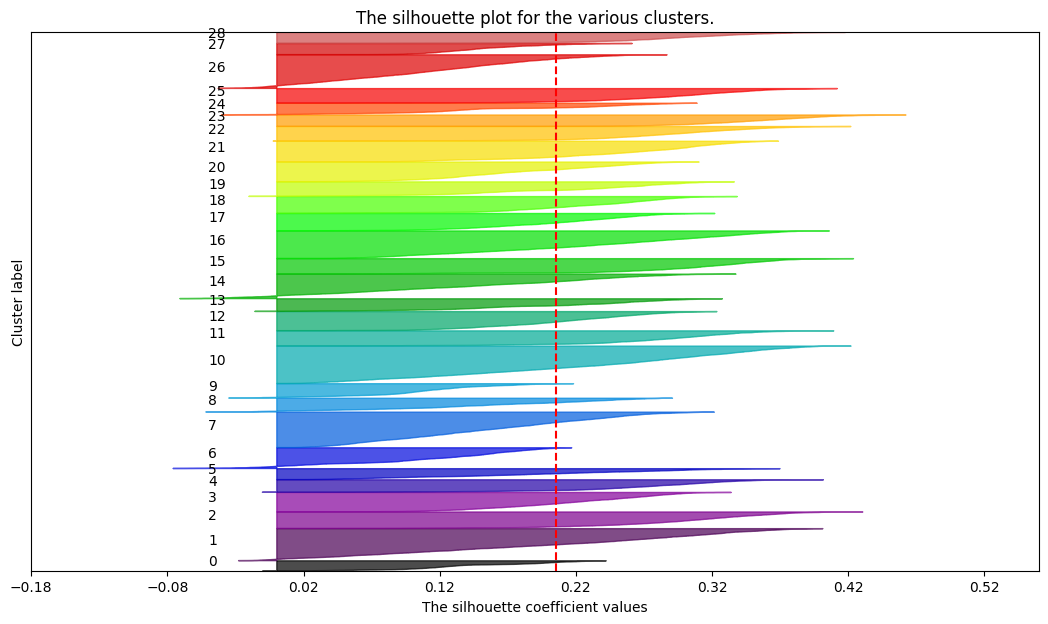

In [21]:
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue

    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df[metric_features])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df[metric_features], cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df[metric_features], cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])

    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df[metric_features]) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

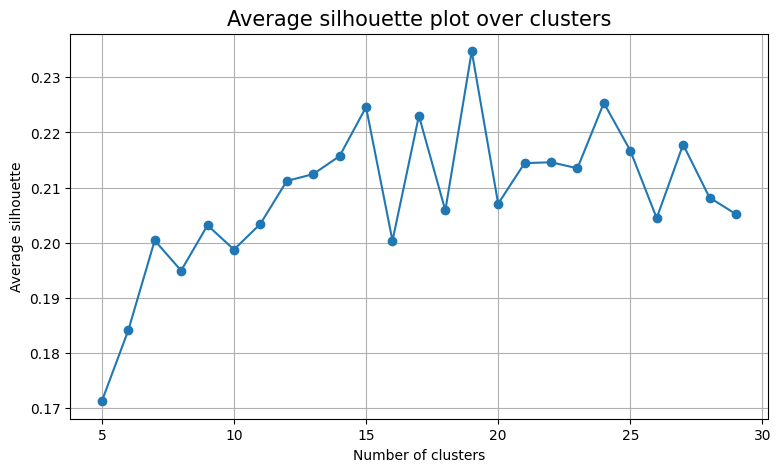

In [24]:
plt.figure(figsize=(9, 5))
plt.plot(range_clusters, avg_silhouette, marker='o')  # Plotting range_clusters on X and avg_silhouette on Y

plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.grid(True)
plt.show()

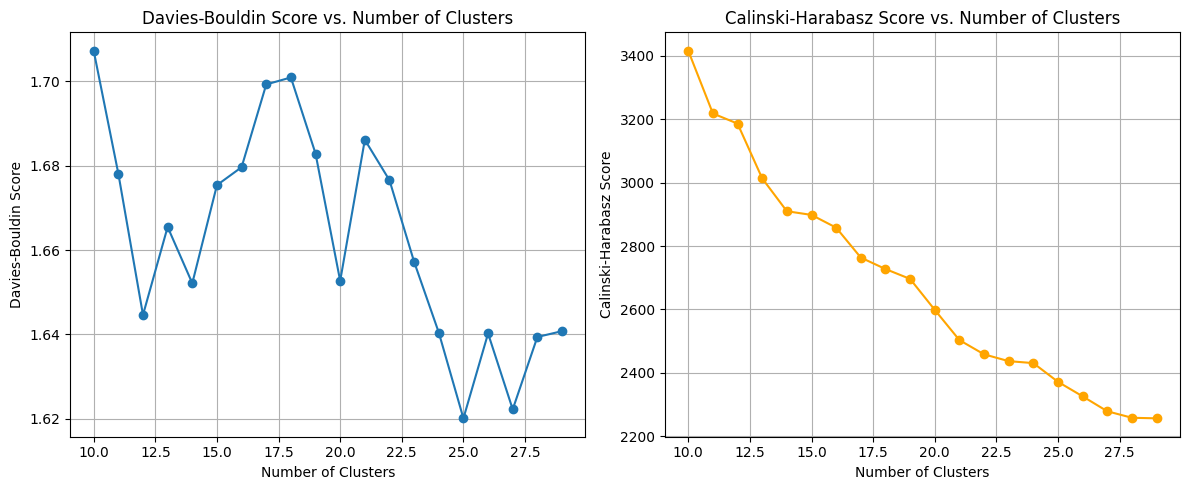

In [26]:
# Define range for number of clusters to evaluate
cluster_range = range(10, 30)  # Typically, 2 to 10 clusters are tested
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Loop over different numbers of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df)

    # Calculate Davies-Bouldin score
    db_score = davies_bouldin_score(df, cluster_labels)
    davies_bouldin_scores.append(db_score)

    # Calculate Calinski-Harabasz score
    ch_score = calinski_harabasz_score(df, cluster_labels)
    calinski_harabasz_scores.append(ch_score)

# Plot Davies-Bouldin and Calinski-Harabasz scores
plt.figure(figsize=(12, 5))

# Davies-Bouldin Score Plot
plt.subplot(1, 2, 1)
plt.plot(cluster_range, davies_bouldin_scores, marker='o')
plt.title("Davies-Bouldin Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Score")
plt.grid(True)

# Calinski-Harabasz Score Plot
plt.subplot(1, 2, 2)
plt.plot(cluster_range, calinski_harabasz_scores, marker='o', color='orange')
plt.title("Calinski-Harabasz Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Calinski-Harabasz Score")
plt.grid(True)

plt.tight_layout()
plt.show()

In [17]:
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans_labels = kmeans.fit_predict(df)


In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df)

# Step 4: Create a DataFrame for visualization
df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df['Cluster'] = kmeans_labels  # Add KMeans cluster labels to DataFrame

# Step 5: Plot the t-SNE results, color-coded by KMeans cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', palette='viridis', data=df, s=100, marker='o', legend='full')
plt.title("t-SNE Visualization of KMeans Clustering")
plt.show()

In [18]:
df_clean=pd.read_csv('df_clean.csv',delimiter=',')

In [31]:
df_clean['cluster'] = kmeans_labels
cluster_summary = df_clean.groupby('cluster')

In [32]:
cuisines = [col for col in df_clean.columns if col.startswith("CUI_")]
cluster_cuisine_spending = cluster_summary[cuisines]

In [ ]:
cluster_cuisine_spending.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Cuisine Spending by Cluster')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Spending')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()